In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [12]:
bonds=pd.read_csv('bonds.csv',usecols=['Date','Open'])
copper=pd.read_csv('Copper_Futures_Historical_Data.csv',usecols=['Date','Open'])
crude_oil=pd.read_csv('Crude_Oil_WTI_Futures_Historical_Data.csv',usecols=['Date','Open'])
gold=pd.read_csv('gold.csv',usecols=['Date','Open'])
nasdaq=pd.read_csv('Nasdaq_100_Historical_Data.csv',usecols=['Date','Open'])
platinum=pd.read_csv('platinum.csv',usecols=['Date','Open'])
spx=pd.read_csv('S&P_500_Historical_Data.csv',usecols=['Date','Open'])
silver=pd.read_csv('silver.csv',usecols=['Date','Open'])

for df in (bonds,copper,crude_oil,gold,nasdaq,platinum,spx,silver):
   
    df['Date']=pd.to_datetime(df['Date'])
    df.set_index('Date',inplace=True)
    print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1269 entries, 2018-01-02 to 2022-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1269 non-null   float64
dtypes: float64(1)
memory usage: 19.8 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1314 entries, 2022-12-30 to 2018-01-02
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1314 non-null   float64
dtypes: float64(1)
memory usage: 20.5 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1320 entries, 2022-12-30 to 2018-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1320 non-null   float64
dtypes: float64(1)
memory usage: 20.6 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1291 entries, 2018-01-02 to 2022-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtyp

In [7]:
import os

print("Current working directory:", os.getcwd())
print("\nFiles in this directory:")
for file in os.listdir():
    print(file)

Current working directory: /Users/tomas/PycharmProjects/data_project_1/Heatmap

Files in this directory:
gold.csv
bonds.csv
platinum.csv
Copper_Futures_Historical_Data.csv
S&P_500_Historical_Data.csv
silver.csv
Nasdaq_100_Historical_Data.csv
Crude_Oil_WTI_Futures_Historical_Data.csv
heatmap.ipynb


In [6]:
correct_directory='/Users/tomas/PycharmProjects/data_project_1/Heatmap'
os.chdir(correct_directory)

print("Current working directory:", os.getcwd())

Current working directory: /Users/tomas/PycharmProjects/data_project_1/Heatmap


In [13]:
df_list = [bonds, copper, crude_oil, gold, nasdaq, platinum, spx, silver]
df_names = ['Bonds', 'Copper', 'Crude_Oil', 'Gold', 'Nasdaq', 'Platinum', 'S&P_500', 'Silver']

for df,name in zip(df_list, df_names):
    df.rename(columns={'Open': name}, inplace=True) 
    print(df.head())

             Bonds
Date              
2018-01-02  4.9990
2018-01-03  4.9990
2018-01-04  4.9920
2018-01-05  4.9945
2018-01-08  4.9940
            Copper
Date              
2022-12-30  3.8310
2022-12-29  3.8400
2022-12-28  3.8595
2022-12-27  3.8565
2022-12-26  3.8125
            Crude_Oil
Date                 
2022-12-30      78.73
2022-12-29      78.82
2022-12-28      79.89
2022-12-27      79.90
2022-12-26      79.92
               Gold
Date               
2018-01-02  1303.38
2018-01-03  1317.61
2018-01-04  1313.23
2018-01-05  1322.73
2018-01-08  1320.97
               Nasdaq
Date                 
2022-12-30  10,835.59
2022-12-29  10,800.80
2022-12-28  10,807.12
2022-12-27  10,944.30
2022-12-23  10,911.04
            Platinum
Date                
2018-01-02    932.87
2018-01-03    945.00
2018-01-04    957.40
2018-01-05    963.04
2018-01-08    967.88
             S&P_500
Date                
2022-12-30  3,829.06
2022-12-29  3,805.45
2022-12-28  3,829.56
2022-12-27  3,843.34
2022-12-23  3

In [16]:
from functools import reduce

merged_df=reduce(lambda left,right: pd.merge(left,right,on='Date'),df_list)
print(merged_df.head())
print(merged_df.info())

             Bonds  Copper  Crude_Oil     Gold    Nasdaq  Platinum   S&P_500  \
Date                                                                           
2018-01-02  4.9990  3.3090      60.20  1303.38  6,431.59    932.87  2,683.70   
2018-01-03  4.9990  3.2895      60.39  1317.61  6,520.03    945.00  2,697.80   
2018-01-04  4.9920  3.2710      61.96  1313.23  6,595.75    957.40  2,719.30   
2018-01-05  4.9945  3.2705      61.90  1322.73  6,613.12    963.04  2,731.30   
2018-01-08  4.9940  3.2500      61.61  1320.97  6,651.68    967.88  2,742.70   

             Silver  
Date                 
2018-01-02  16.9815  
2018-01-03  17.1825  
2018-01-04  17.1255  
2018-01-05  17.2255  
2018-01-08  17.2365  
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1240 entries, 2018-01-02 to 2022-12-30
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Bonds      1240 non-null   float64
 1   Copper     1240 non-null   float64
 

In [17]:
merged_df['S&P_500']=merged_df['S&P_500'].str.replace(',','').astype(float)
merged_df['Nasdaq']=merged_df['Nasdaq'].str.replace(',','').astype(float)
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1240 entries, 2018-01-02 to 2022-12-30
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Bonds      1240 non-null   float64
 1   Copper     1240 non-null   float64
 2   Crude_Oil  1240 non-null   float64
 3   Gold       1240 non-null   float64
 4   Nasdaq     1240 non-null   float64
 5   Platinum   1240 non-null   float64
 6   S&P_500    1240 non-null   float64
 7   Silver     1240 non-null   float64
dtypes: float64(8)
memory usage: 87.2 KB
None


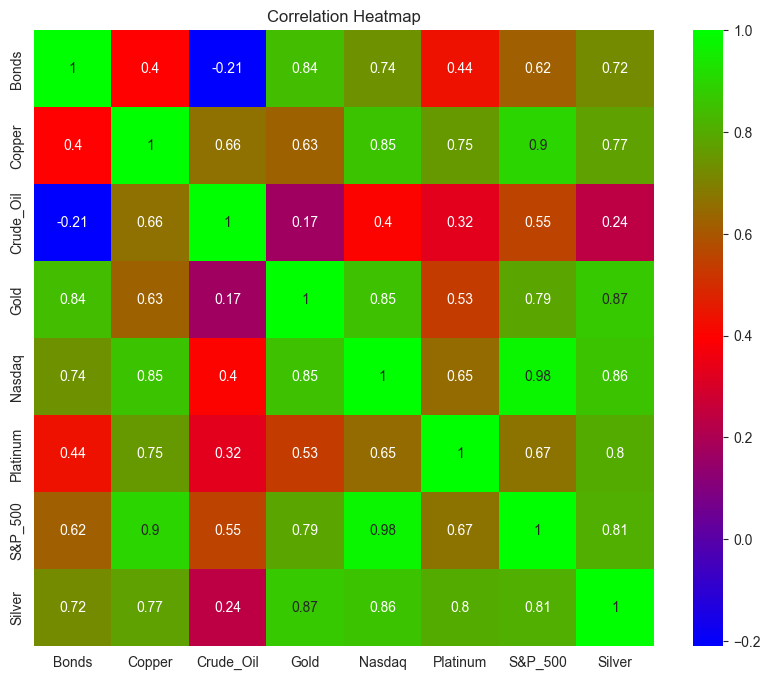

In [47]:
corr_matrix=merged_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='brg')
plt.title('Correlation Heatmap')
plt.show()

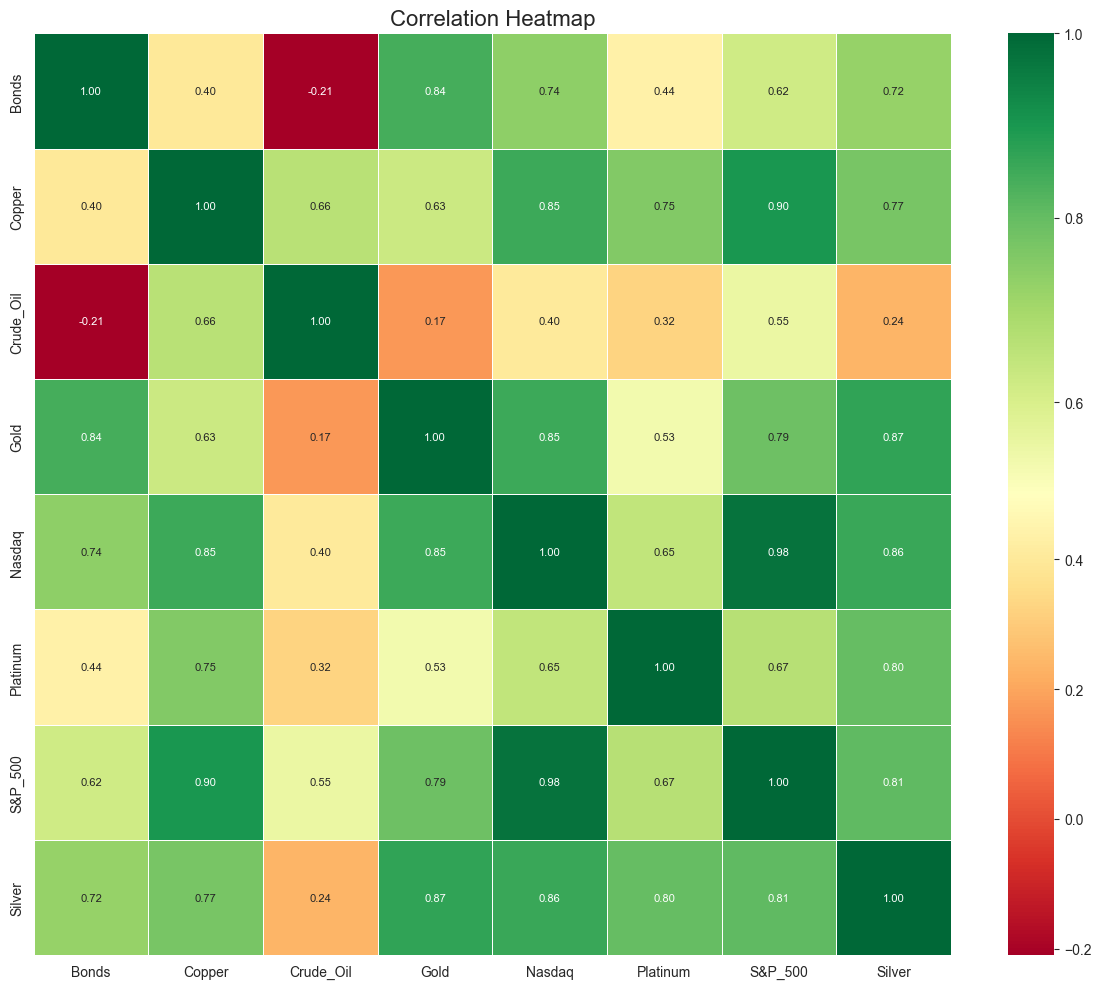

In [27]:
from matplotlib.colors import TwoSlopeNorm
# Set the style
sns.set_style("white")

# Create the figure and adjust size
plt.figure(figsize=(12, 10))

# Create a custom normalizer
norm = TwoSlopeNorm(vmin=corr_matrix.min().min(), vcenter=0.5, vmax=1)

# Create heatmap with customizations
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt='.2f', 
            cmap='RdYlGn',
            norm=norm,
            annot_kws={'size': 8},
            linewidths=0.5)

plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()

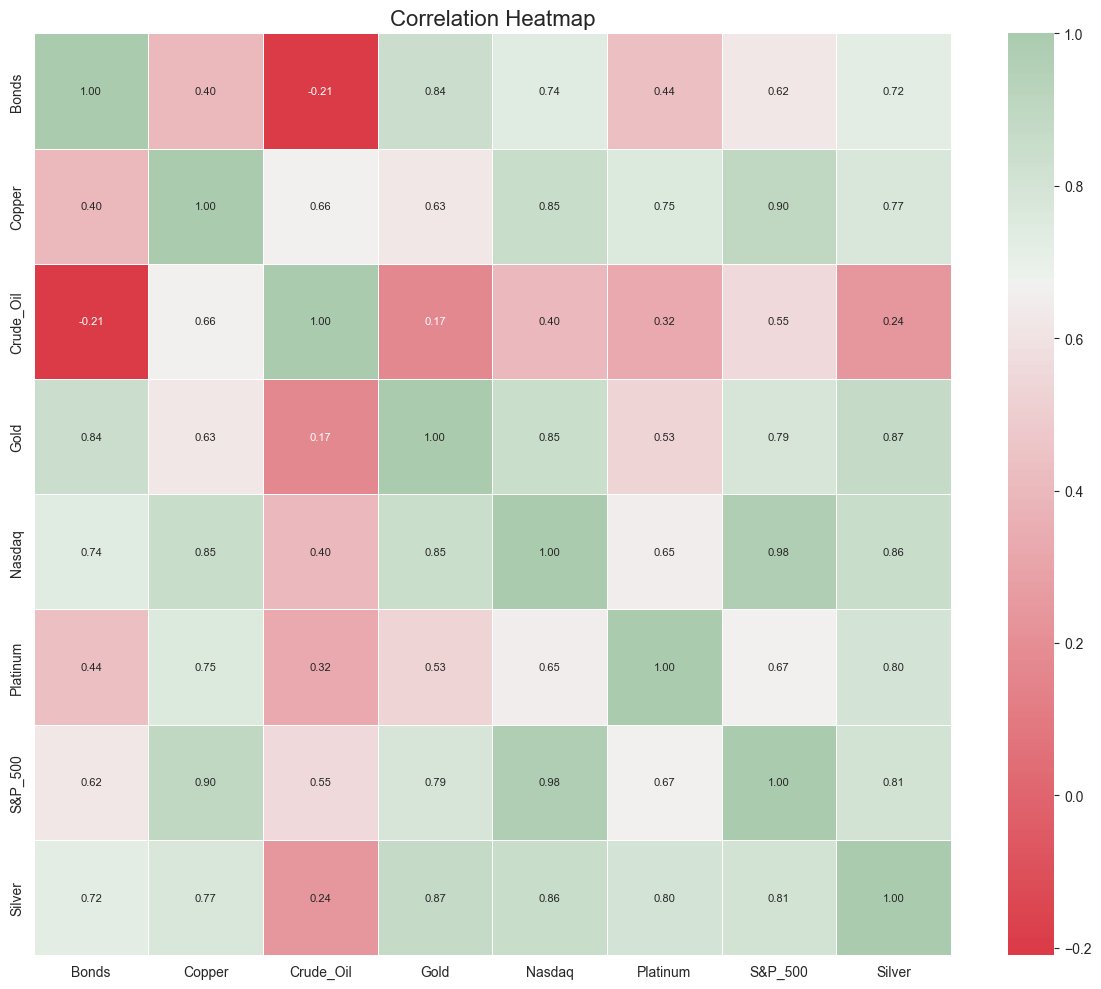

In [28]:
# Set the style
sns.set_style("white")

# Create the figure and adjust size
plt.figure(figsize=(12, 10))

# Create a custom colormap
cmap = sns.diverging_palette(10, 130, as_cmap=True)

# Create heatmap with customizations
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt='.2f', 
            cmap=cmap, 
            vmin=corr_matrix.min().min(),  # Use the actual min value
            vmax=1,  # Max correlation is always 1
            center=corr_matrix.mean().mean(),  # Use the mean as the center
            annot_kws={'size': 8},
            linewidths=0.5)

plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()

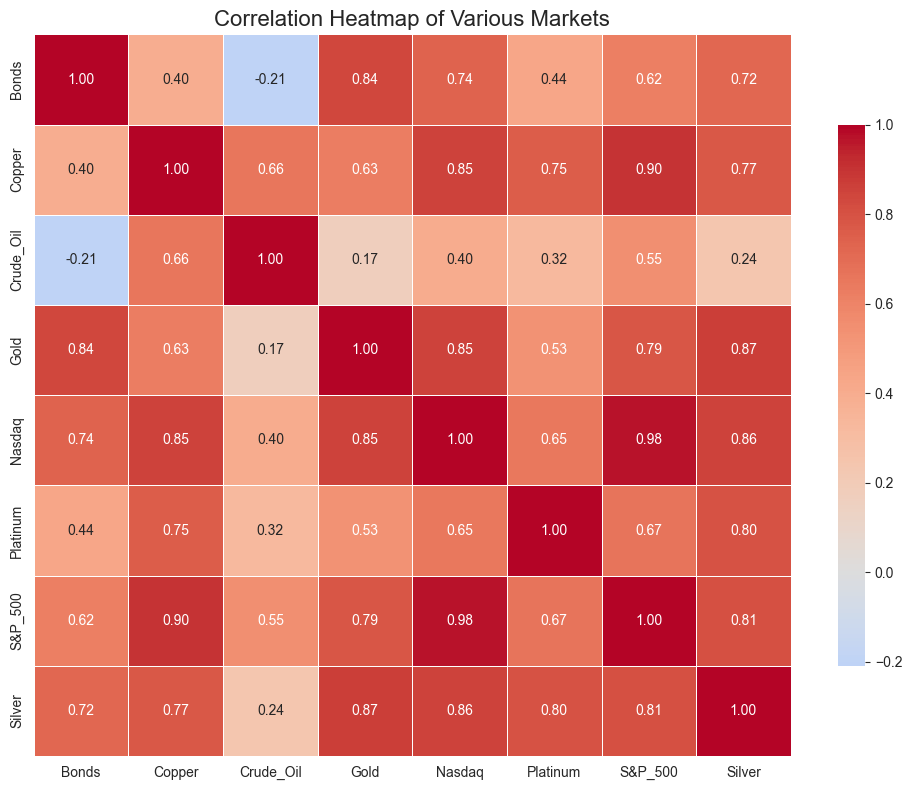

In [35]:
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(
    corr_matrix, 
    annot=True,      # Show the correlation values
    fmt=".2f",       # Format the values to 2 decimal places
    cmap="coolwarm", # Diverging color palette
    center=0,        # Center the colormap at zero to highlight deviations
    linewidths=0.5,  # Add lines between squares for better readability
    cbar_kws={"shrink": 0.75}  # Shrink color bar to fit
)

# Set the title for the heatmap
plt.title("Correlation Heatmap of Various Markets", fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

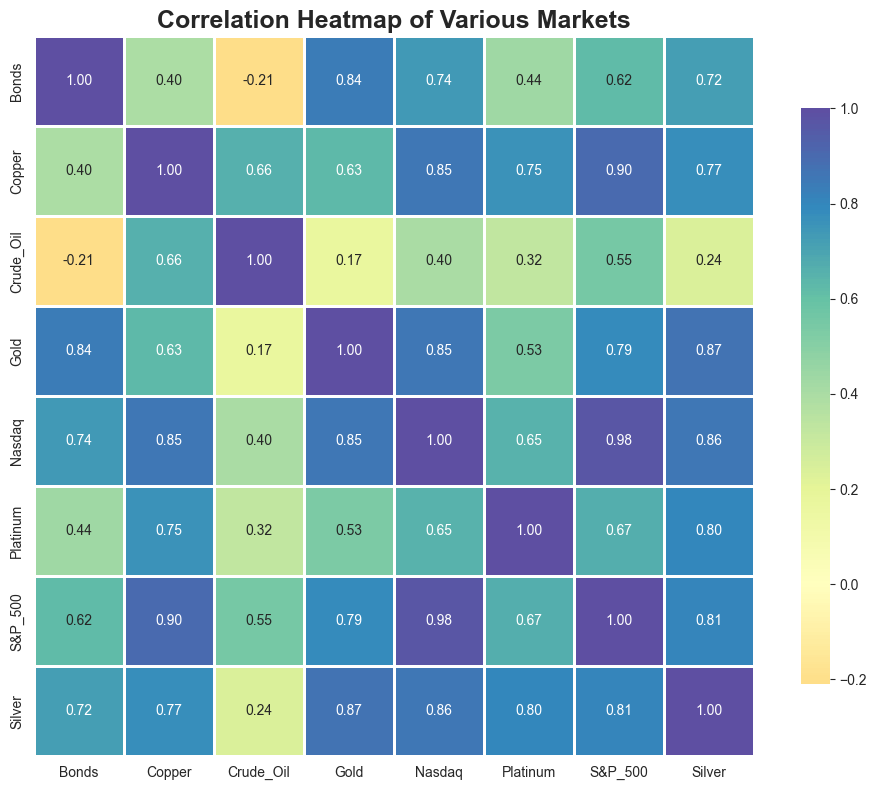

In [36]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap with a more distinct color palette
sns.heatmap(
    corr_matrix, 
    annot=True,      # Show the correlation values
    fmt=".2f",       # Format the values to 2 decimal places
    cmap="Spectral", # Distinct color palette for better visibility
    center=0,        # Center the colormap at zero
    linewidths=1,    # Thicker lines between cells
    linecolor='white', # White lines for better separation
    cbar_kws={"shrink": 0.8},  # Shrink color bar to fit
    square=True      # Make the cells square for a better layout
)

# Set the title for the heatmap
plt.title("Correlation Heatmap of Various Markets", fontsize=18, weight='bold')

# Show the plot
plt.tight_layout()
plt.show()

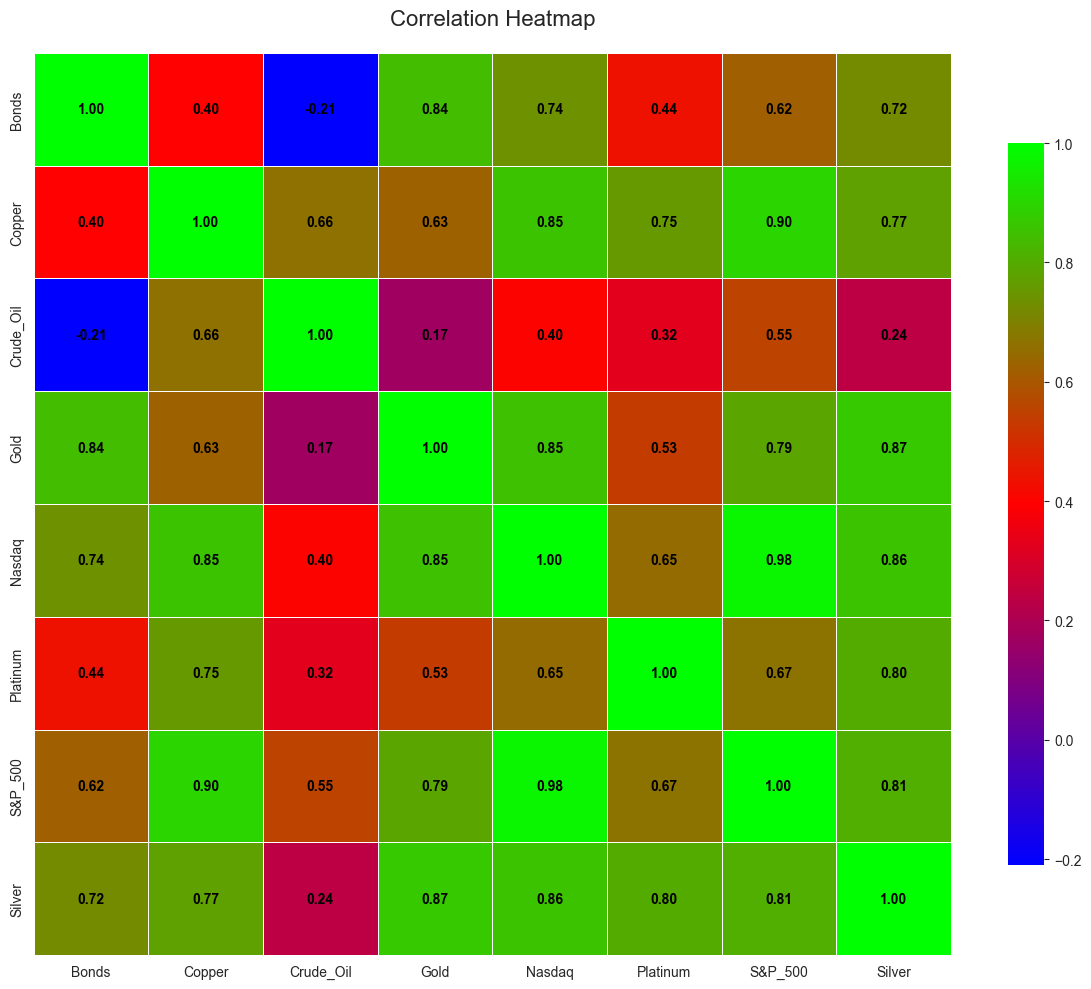

In [48]:
plt.figure(figsize=(12, 10))  # Slightly larger figure to accommodate spaces

sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='brg',
            fmt='.2f',
            linewidths=0.5,  # This adds lines between cells
            annot_kws={'color': 'black', 'fontweight': 'bold'},  # This makes the numbers black and bold
            cbar_kws={'shrink': .8}  # This shrinks the colorbar slightly
           )

plt.title('Correlation Heatmap', fontsize=16, pad=20)  # Increased font size and padding
plt.tight_layout()
plt.show()

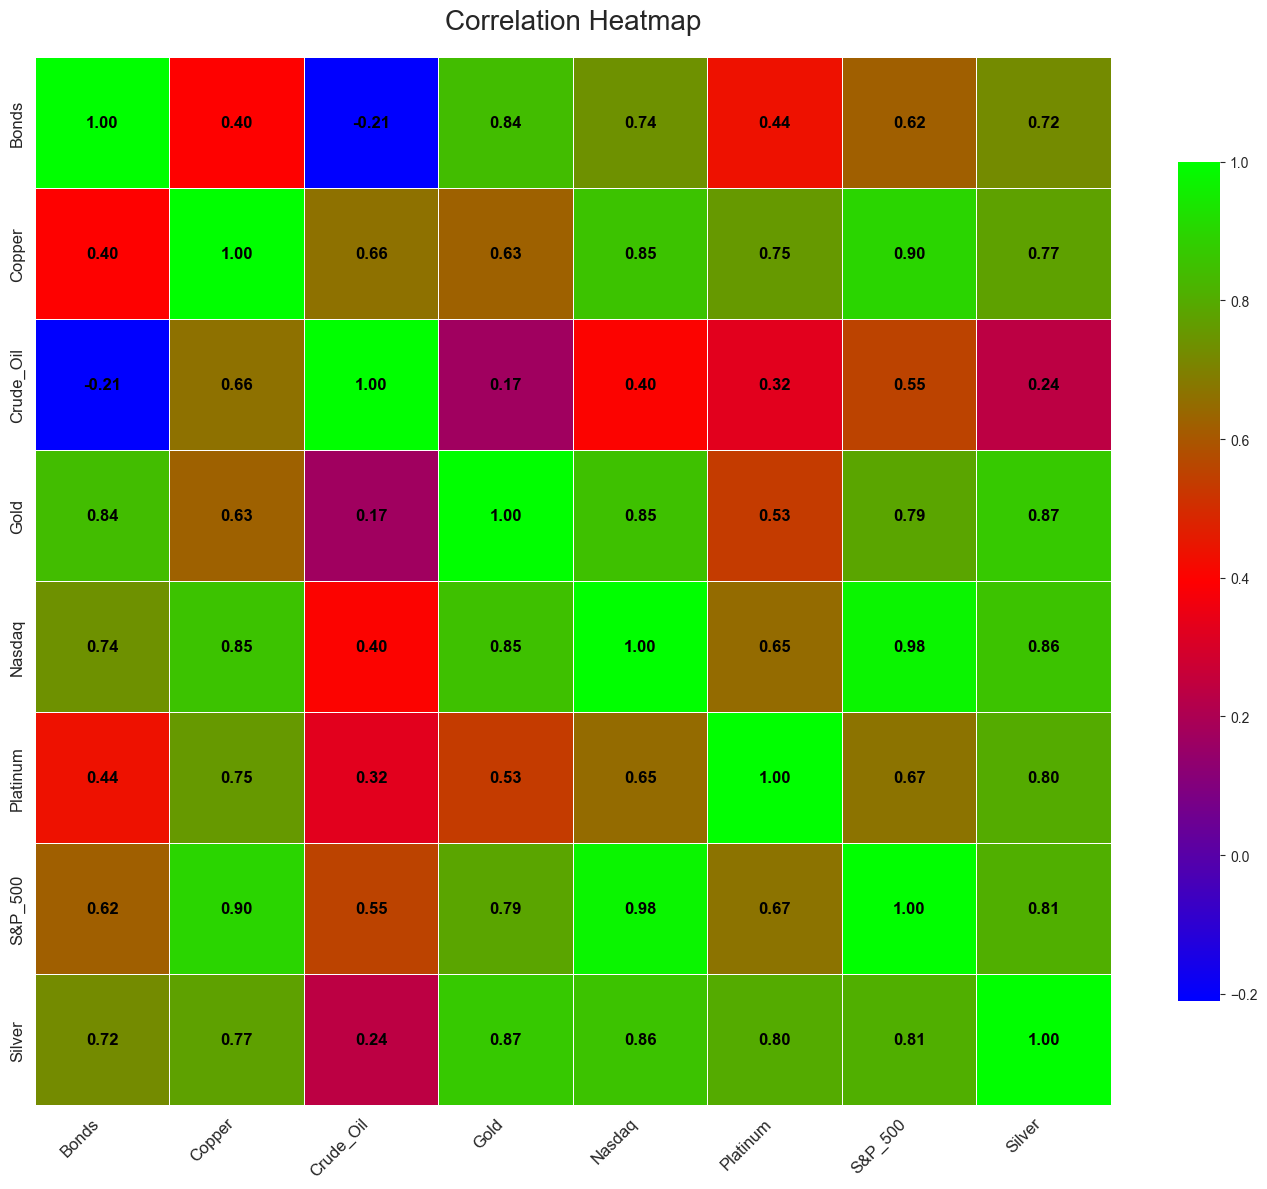

In [49]:

plt.figure(figsize=(14, 12))  # Increased figure size for better readability

sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='brg',
            fmt='.2f',
            linewidths=0.5,
            annot_kws={'color': 'black', 'fontweight': 'bold', 'fontsize': 12},  # Increased font size and ensured black color
            cbar_kws={'shrink': .8}
           )

plt.title('Correlation Heatmap', fontsize=20, pad=20)
plt.xticks(fontsize=12, rotation=45, ha='right')  # Increased tick label size and rotated for better fit
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

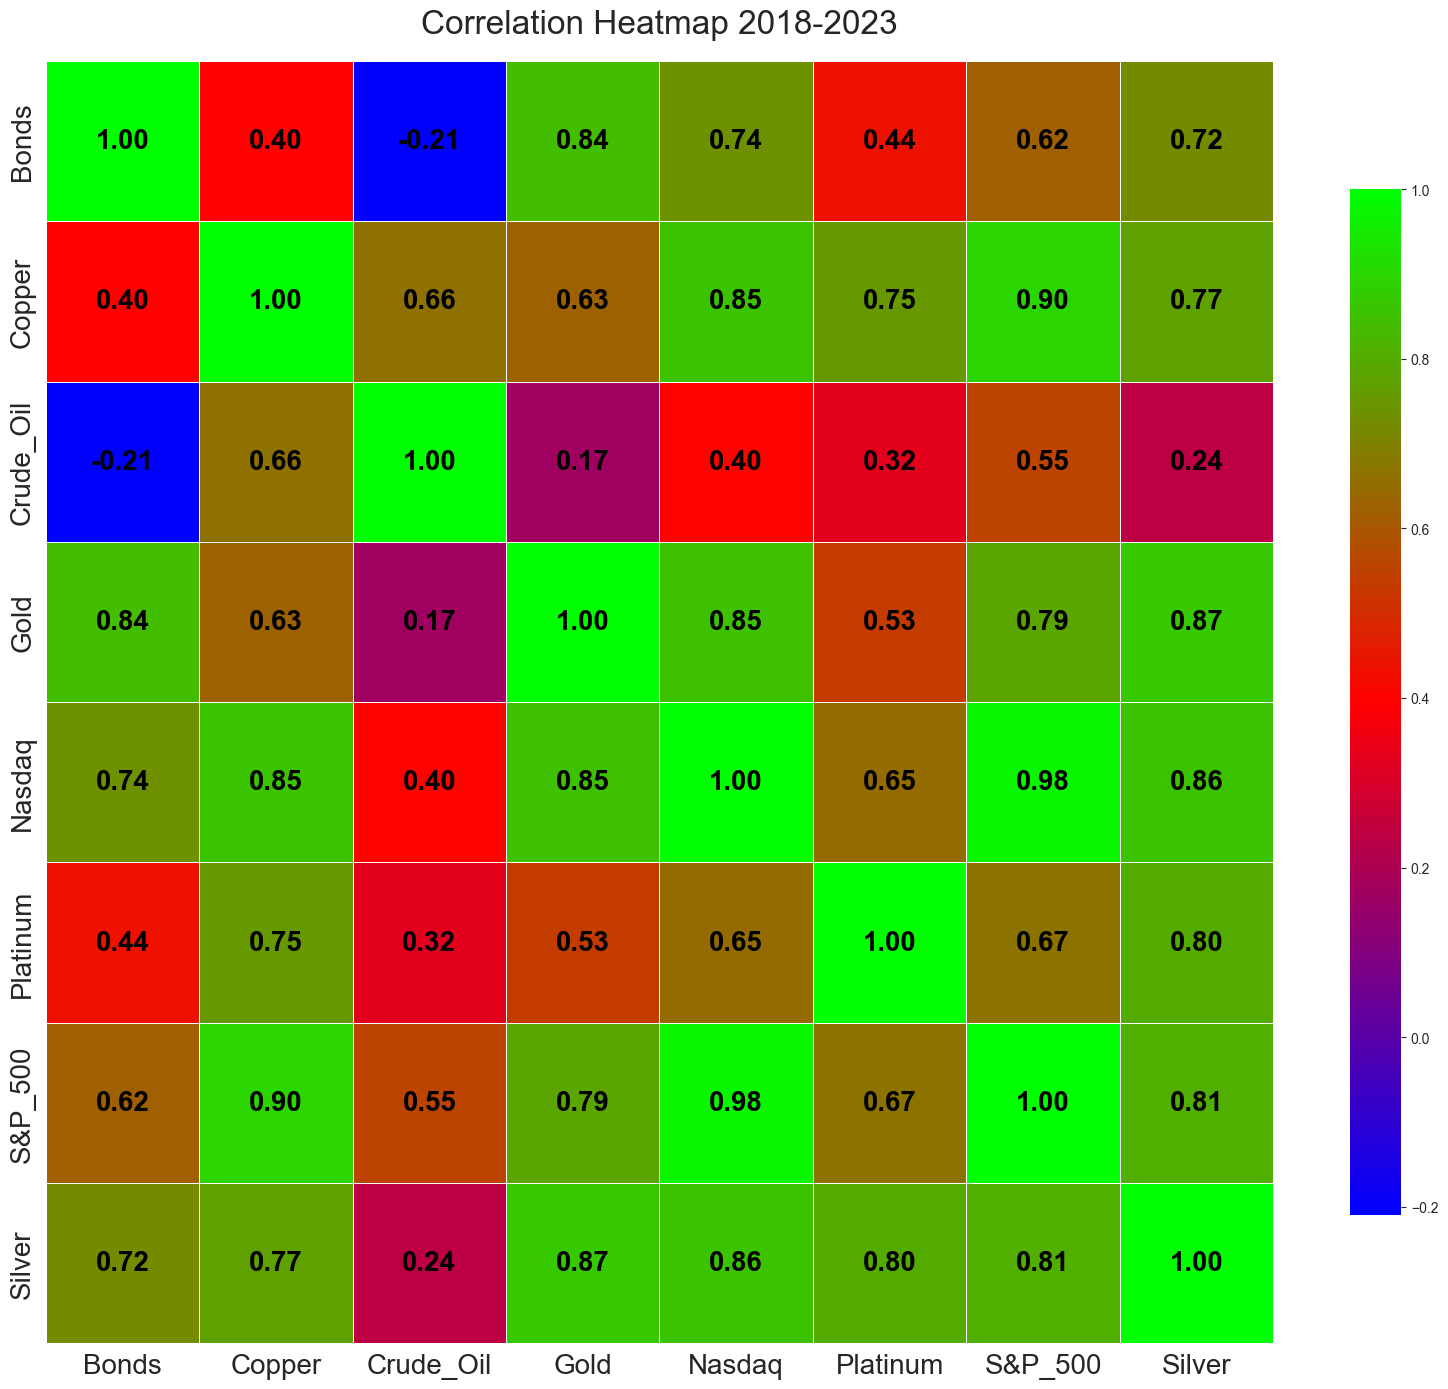

In [53]:
plt.figure(figsize=(16, 14))  # Even larger figure size

sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='brg',
            fmt='.2f',
            linewidths=0.5,
            annot_kws={'color': 'black', 'fontweight': 'bold', 'fontsize': 20},  # Much larger font size
            cbar_kws={'shrink': .8}
           )

plt.title('Correlation Heatmap 2018-2023', fontsize=24, pad=20)
plt.xticks(fontsize=20)  # Larger tick label size, no rotation
plt.yticks(fontsize=20)

# Adjust layout to prevent cutting off labels
plt.tight_layout()
plt.show()